# Amplitude Modulation Basics

Click "Run All" when running the notebook for the first time.

**Note 1:** When taking Fourier transform, in most cases, only the magnitude spectrum is of interest because it shows the shape of the transform, and which frequencies are present. 

**Note 2:** When taking the Fourier transform using the FFT function in any software, FFT needs to be scaled. The reason for this explained [in this blog.](https://sites.psu.edu/charlesammon/2017/03/09/how-to-determine-fft-scaling-with-matlab/) 

**Note 2.1:** For periodic signals, the FFT needs to be scaled by the length of the time array `n = len(t)`, probably because the signal is continuous over the entire time array.

**Note 2.2:** For aperiodic signals, the FFT needs to be scaled by time step of the time array `dt = t[1]-t[0]`, probably because the signal only exists for a finite portion of the time array. 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# Define a generic unit step function
def u(t):
    x = np.zeros(len(t))
    # tt keeps track of the value of t while the loop iterates
    # tt is equivalent to t[i]
    for i, tt in enumerate(t):
        if tt > 0:
            x[i] = 1.0
    return x

# Define function for creating a rectangular pulse
# where tau = pulse width and 
# the pulse is active over -tau/2 <= t <= tau/2.
def rect(t,tau):
    x = np.zeros(len(t))
    for i, tt in enumerate(t):
        if (np.abs(tt)>tau/2):
            x[i] = 0
        else:
            x[i] = 1
    return x

# Define a simulated delta function using step functions
def delta(t):
    x = np.zeros(len(t))
    # Td is the pulse width set equal to the time step
    Td = t[1]-t[0]
    # The amplitude is set to 1/Td, so that area under
    # the pulse is unity.
    x = (1/Td)*(u(t)-u(t-Td))
    return x   

# Create time axis
t = np.linspace(0,3,2048)

# Create the frequency axis
dt = t[1]-t[0]
N = len(t)
# The fftshift function will center the 0th frequency.
freq = np.fft.fftshift(np.fft.fftfreq(N,dt)) 

## Double sideband amplitude modulation (DSB-AM)

Let the baseband (message) signal, $m(t)$ be given by
$$
m(t) = 0.5\sin(2\pi 1t)\ +\ 0.5\cos(2\pi 2t)
$$ 

Let the carrier signal, $c(t)$, be given by
$$
c(t) = A_{c}\cos(2\pi f_{c}t)
$$
where $A_{c}=1.0$ and $f_{c}=20\,\mathrm{Hz}$.

0.500015898909354


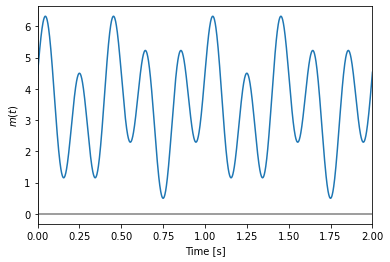

In [17]:
# Define baseband (message) signal
m_t = 2.5 + 2.0*np.sin(2.0*np.pi*5*t)+2.0*(np.cos(2.0*np.pi*1*t))**2

print(np.amin(m_t))

# Define carrier signal
Ac = 2.0                # Carrier amplitude
fc = 25                 # Carrier frequency
c_t = Ac*np.cos(2.0*np.pi*fc*t)

# Plot the signal
#plt.figure(figsize=(6,6))
#plt.subplot(311)
plt.axvline(color='gray')
plt.xlim(0,2)
plt.axhline(color='gray')
plt.plot(t,m_t)
plt.ylabel('$m(t)$')

#plt.subplot(312)
#plt.axvline(color='gray')
#plt.axhline(color='gray')
#plt.plot(t,c_t)
#plt.ylabel('$c(t)$')

plt.xlabel('Time [s]')
plt.show()

2.1249996377043274


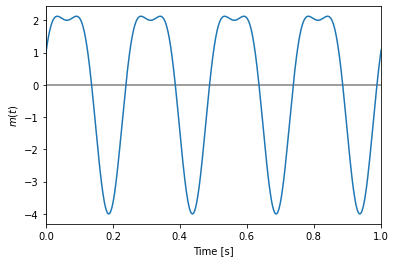

In [29]:
# Define baseband (message) signal
m_t = 3*np.sin(2.0*np.pi*4*t)+ 1.0*(np.cos(2.0*np.pi*8*t))
#m_t = 1 + 0.6*np.sin(2.0*np.pi*4*t)+ 0.6*(np.cos(2.0*np.pi*8*t))

print(np.amax(m_t))

# Define carrier signal
Ac = 10               # Carrier amplitude
fc = 50                 # Carrier frequency
c_t = Ac*np.cos(2.0*np.pi*fc*t)

# Plot the signal
#plt.figure(figsize=(6,6))
#plt.subplot(311)
plt.axvline(color='gray')
plt.xlim(0,2)
plt.axhline(color='gray')
plt.plot(t,m_t)
plt.ylabel('$m(t)$')

#plt.subplot(312)
#plt.axvline(color='gray')
#plt.axhline(color='gray')
#plt.plot(t,c_t)
#plt.ylabel('$c(t)$')

plt.xlabel('Time [s]')
plt.xlim(0,1)
plt.show()

## AM as a form of linear modulation

In AM, the amplitude of the carrier signal, $c(t)$ is varied about a mean value _linearly_ with the baseband signal, $m(t)$.

Therefore, the modulated signal, $s(t)$, can be expressed as
$$
\begin{align*}
s(t) &= A_{c}\cos(2\pi f_{c}t)\ +\ k_{a}m_{t}A_{c}\cos(2\pi f_{c}t)\\
&= [1+k_{a}m(t)]A_{c}\cos(2\pi f_{c} t)\\
&= [1+k_{a}m(t)]A_{c}\cos(2\pi f_{c} t)\\
s(t) &= a(t)\cos(2\pi f_{c}t)
\end{align*}
$$
where $k_{a}$ is the amplitude sensitivity constant, and $a(t)=[1+k_{a}m(t)]A_{c}$ is the envelope of the modulated carrier.

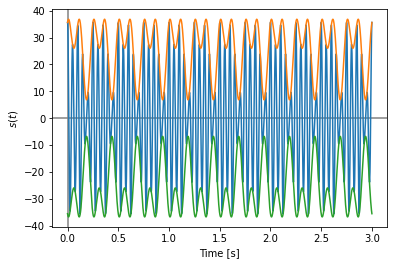

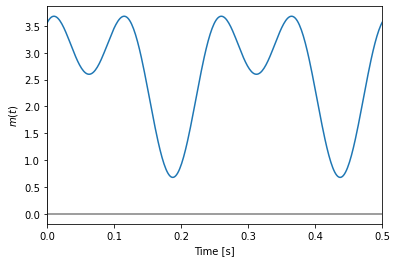

In [27]:
# Define the amplitude sensitivity of the modulated signal
ka = 1.6

# Define the envelope of the modulated signal
a_t = (1.0+ka*m_t)*Ac

# Define the modulated signal
s_t = a_t*np.cos(2.0*np.pi*fc*t)

# Plot the signal
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,s_t)
plt.plot(t,a_t)
plt.plot(t,-a_t)
plt.ylabel('$s(t)$')
plt.xlabel('Time [s]')
plt.show()

# Plot the signal
#plt.figure(figsize=(6,6))
#plt.subplot(311)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,1+ka*m_t)
plt.ylabel('$m(t)$')

#plt.subplot(312)
#plt.axvline(color='gray')
#plt.axhline(color='gray')
#plt.plot(t,c_t)
#plt.ylabel('$c(t)$')

plt.xlabel('Time [s]')
plt.xlim(0,0.5)
plt.show()

## Effect of amplitude sensitivity constant, $k_{a}$

Let the modulated signal $s(t)$ be defined using different values of $k_{a}$, such as $k_{a}=0.5,\ 1.0,\ \mathrm{and}\ 2.0$.

For the given example, $|m(t)|_{min}=1$. 

For $k_{a}=0.5$, $|k_{a}m(t)|<1$ for all $t$. This ensures that the envelope of the modulated signal $a(t)=A_{c}[1+k_{a}m(t)]>0$ for all $t$.

For $k_{a}=1.0$, the signal is said to be 100% modulated because $|k_{a}m(t)|=1$.

For $k_{a}=1.5$, $|k_{a}m(t)|>1$ for some $t$. In this case, the signal is overmodulated.

Whenever the factor $1+k_{a}m(t)$ crosses zero, the carrier will reverse phase because negative values correspond to the phase shift of $\pm 180^{\circ}$.

This will cause the envelope of the modulated signal $s(t)$ to become distorted.

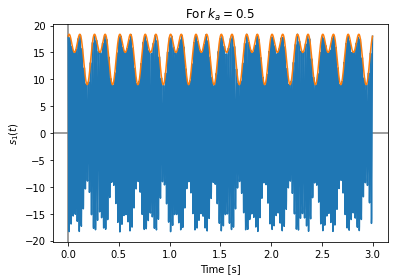

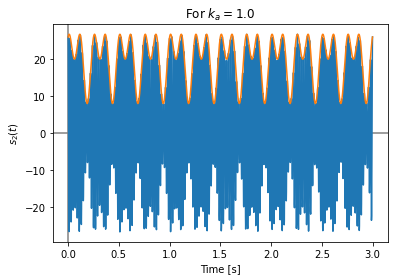

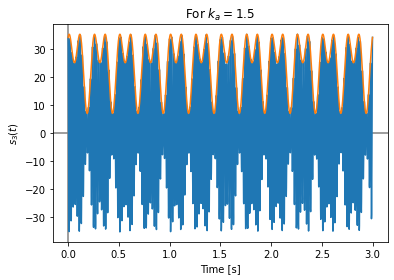

In [20]:
# Define the amplitude sensitivity of the modulated signal
ka_1 = 0.5
ka_2 = 1
ka_3 = 1.5

# Define the envelope of the modulated signal
a1_t = (1.0+ka_1*m_t)*Ac
a2_t = (1.0+ka_2*m_t)*Ac
a3_t = (1.0+ka_3*m_t)*Ac

# Define the modulated signal
s1_t = a1_t*np.cos(2.0*np.pi*fc*t)
s2_t = a2_t*np.cos(2.0*np.pi*fc*t)
s3_t = a3_t*np.cos(2.0*np.pi*fc*t)

# Plot the signal
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,s1_t)
plt.plot(t,a1_t)
#plt.plot(t,-a1_t)
plt.ylabel('$s_{1}(t)$')
plt.xlabel('Time [s]')
plt.title('For $k_{a}=0.5$')
plt.show()

# Plot the signal
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,s2_t)
plt.plot(t,a2_t)
#plt.plot(t,-a2_t)
plt.ylabel('$s_{2}(t)$')
plt.xlabel('Time [s]')
plt.title('For $k_{a}=1.0$')
plt.show()

# Plot the signal
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,s3_t)
plt.plot(t,a3_t)
#plt.plot(t,-a3_t)
plt.ylabel('$s_{3}(t)$')
plt.xlabel('Time [s]')
plt.title('For $k_{a}=1.5$')
plt.show()

## Fourier transform of DSB-AM

This is given by
$$
S(f) = \dfrac{A_{c}}{2}[\delta(f-f_{c})+\delta(f+f_{c})]+\dfrac{A_{c}k_{a}}{2}[M(f-f_{c})+M(f+f_{c})]
$$
where the first term is the Fourier transform of the unmodulated carrier signal, and the second term is the Fourier transform of the message signal $M(f)$ that has been shifted to be centered around the carrier frequency i.e. at $f=\pm f_{c}$.

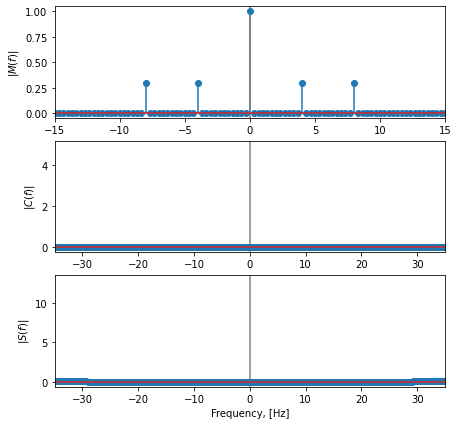

In [21]:
# Calculate FFT. 
M_f = np.fft.fftshift(np.fft.fft(m_t))/N      # message signal
C_f = np.fft.fftshift(np.fft.fft(c_t))/N      # carrier signal
S_f = np.fft.fftshift(np.fft.fft(s_t))/N      # modulated signal

# Plot the magnitude spectrum
plt.figure(figsize=(7,7))
plt.subplot(311)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,np.abs(M_f))
plt.xlim(-15,15)
plt.ylabel('$|M(f)|$')

plt.subplot(312)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,np.abs(C_f))
plt.xlim(-35,35)
plt.ylabel('$|C(f)|$')

plt.subplot(313)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,np.abs(S_f))
plt.xlim(-35,35)
plt.ylabel('$|S(f)|$')

plt.xlabel('Frequency, [Hz]')
plt.show()

## Create the DSB-AM signal
The DSB-AM signal is created by scaling and adding a DC bias to the message signal i.e. $1+k_{a}m(t)$, and then shifting it to a higher frequency by modulating the carrier amplitude.
$$
\begin{align*}
s(t) &= [1+k_{a}m(t)]A_{c}\cos(2\pi f_{c} t)\\
&= A_{c}\cos(2\pi f_{c}t)\ +\ k_{a}m_{t}A_{c}\cos(2\pi f_{c}t)\\
s(t) &= a(t)\cos(2\pi f_{c}t)
\end{align*}
$$
where $k_{a}$ is the amplitude sensitivity constant, and $a(t)=[1+k_{a}m(t)]A_{c}$ is the envelope of the modulated carrier.

## Preventing overmodulation
To prevent overmodulation, the envelope of the DSB-AM signal must always be positive. Therefore, $k_{a}$ should be chosen such that
$$
\begin{align*}
1+k_{a}m(t) &> 0\\
|k_{a}m(t)| &\leq 1\\
k_{a} &\leq \dfrac{1}{|m(t)|_{min}}
\end{align*}
$$

Assume that the carrier frequency is $f_{c}=20\,\mathrm{Hz}$.

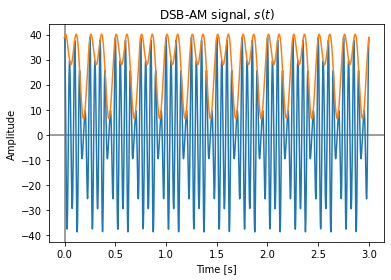

In [22]:
# Define baseband (message) signal
#m_t = 3*np.cos(2*np.pi*3*t)-2*np.cos(2*np.pi*5*t)

# Define carrier signal
#Ac = 1.0
fc = 20
c_t = Ac*np.cos(2.0*np.pi*fc*t)

# Determine value for most minimum point of m(t)
#print('Min[m(t)]=',(np.min(m_t)))

# Define the amplitude sensitivity of the modulated signal
ka = 1.8

# Define the envelope of the modulated signal
a_t = (1.0+ka*m_t)*Ac

# Define the DSB-AM signal
s_t = a_t*np.cos(2.0*np.pi*fc*t)

# Plot the signal
plt.title('DSB-AM signal, $s(t)$')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,s_t)
plt.plot(t,a_t)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.show()

## Envelope detection

### Half-wave rectification
On the receiver side, the received signal is first half-wave rectified by passing through a diode. 

This will keep only the positive values of $s(t)$.

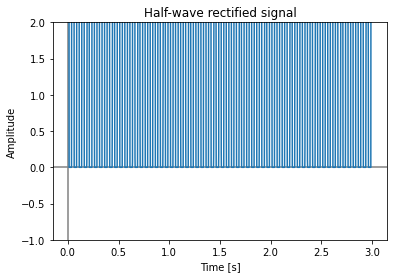

In [23]:
# Create half-wave rectified signal
# np.where will replace all values of s_t < 0 with zero
# and preserve all values of s_t > 0
s_hwr_t = np.where(s_t<0,0,s_t)

# Plot the signal
plt.title('Half-wave rectified signal')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,s_hwr_t)
#plt.plot(t,a_t)
plt.ylim(-1,2)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.show()

### Low pass filtering
The half-wave rectified signal is then passed through a low-pass filter (LPF) to eliminate the carrier frequency component.

The cut-off frequency for LPF needs to be chosen such that it is greater than the highest frequency component of the message signal, $W$, but less than the carrier frequency, $f_{c}$.
$$
W << f_{LPF} << f_{c}
$$

Here, an ideal low pass filter is created using a sinc function as the impulse response.
$$
h_{LPF}(t) = 2f_{LPF}\mathrm{sinc}(2f_{LPF}t)
$$
where $f_{LPF}=10\,\mathrm{Hz}$ is the cut-off frequency.

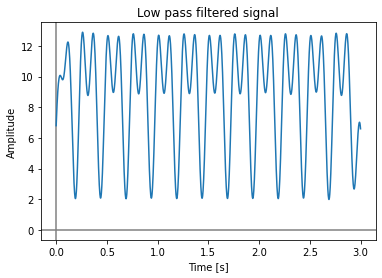

In [24]:
# Define the filter transfer function
f_lpf = 10           # cutoff frequency

# Sinc pulse centered at t=1.5 because time axis goes from 0 to 3
h_lpf_t = 2*f_lpf*np.sinc(2*f_lpf*(t-1.5))

# Apply convolution
s_lpf_t = np.convolve(s_hwr_t,h_lpf_t,'same')*dt

# Plot the signal
plt.title('Low pass filtered signal')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,s_lpf_t)
#plt.ylim(-1,1)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.show()

### DC block
The low pass filtered signal is then passed through a DC blocking circuit (high pass filter) to remove the DC bias so that the signal oscillates around zero.

Here, an ideal high pass filter is created with the impulse response
$$
\begin{align*}
h_{HPF}(t) &= \delta(t)-h_{LPF}(t)\\
&= \delta(t)- 2f_{HPF}\mathrm{sinc}(2f_{HPF}t)
\end{align*}
$$
where $f_{HPF}=1\,\mathrm{Hz}$ is chosen so that the lowest frequency component of $m(t)$ is allowed to pass.

The plot shows a normalized version of the received signal in comparison with the normalized version of the message signal.

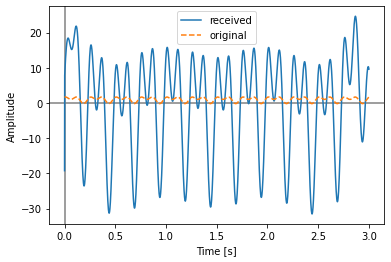

In [25]:
# Define the filter transfer function
f_hpf = 1           # cutoff frequency
K_hpf = 4          # Filter gain

# Sinc pulse centered at t=1.5 because time axis goes from 0 to 3
h_hpf_t = K_hpf*(delta(t-1.5)-2*f_hpf*np.sinc(2*f_hpf*(t-1.5)))

# Apply convolution
s_hpf_t = np.convolve(s_lpf_t,h_hpf_t,'same')*dt

# Plot the signal
#plt.title('Normalized signals')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,s_hpf_t,label='received')
plt.plot(t,m_t,label='original',linestyle='--')
#plt.plot(t,s_hpf_t/np.max(s_hpf_t),label='received')
#plt.plot(t,m_t/np.max(m_t),label='original')
plt.legend()
#plt.ylim(-1.5,1.5)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.show()